In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



2023-05-27 10:27:53.946745: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exploratory Data Analysis

In [3]:
#Read the data in the directory data, and get the path of the csv files
csv_paths = []
for root, dirs, files in os.walk('data'):
    for file in files:
        if file.endswith('.csv'):
            csv_paths.append(os.path.join(root, file))

# Print the paths of the CSV files
for path in csv_paths:
    print(path)

data/Heating Oil.csv
data/Coffee.csv
data/Lean Hogs.csv
data/Soybean Oil.csv
data/Soybean.csv
data/Sugar.csv
data/Cotton.csv
data/Feeder Cattle.csv
data/RBOB Gasoline.csv
data/Silver.csv
data/Wheat.csv
data/Lumber.csv
data/Soybean Meal.csv
data/Oat.csv
data/Brent Crude Oil.csv
data/Crude Oil.csv
data/Gold.csv
data/Live Cattle.csv
data/Palladium.csv
data/Corn.csv
data/Copper.csv
data/Natural Gas.csv
data/Platinum.csv
data/Cocoa.csv


In [4]:
#Read the csv files into a list of dataframes
dfs = []
for path in csv_paths:
    df = pd.read_csv(path)
    # Add a new column 'Path' containing the file path
    df['Path'] = path
    dfs.append(df)

# Print the first 5 rows of the first 5 dataframes
for df in dfs[:5]:
    display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume,Path
0,2000-09-01,0.985,0.991,0.9705,0.9764,0.9764,14679.0,data/Heating Oil.csv
1,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN,data/Heating Oil.csv
2,2000-09-05,0.995,0.998,0.9750,0.9797,0.9797,17365.0,data/Heating Oil.csv
3,2000-09-06,0.985,1.000,0.9810,0.9966,0.9966,18879.0,data/Heating Oil.csv
4,2000-09-07,0.990,1.030,0.9880,1.0295,1.0295,23851.0,data/Heating Oil.csv


,Date,Open,High,Low,Close,Adj Close,Volume,Path
0,2000-01-03,124.00,124.000000,116.099998,116.500000,116.500000,6640.0,data/Coffee.csv
1,2000-01-04,116.50,120.500000,115.750000,116.250000,116.250000,5492.0,data/Coffee.csv
2,2000-01-05,115.00,121.000000,115.000000,118.599998,118.599998,6165.0,data/Coffee.csv
3,2000-01-06,119.00,121.400002,116.500000,116.849998,116.849998,5094.0,data/Coffee.csv
4,2000-01-07,117.75,117.750000,113.800003,114.150002,114.150002,6855.0,data/Coffee.csv


,Date,Open,High,Low,Close,Adj Close,Volume,Path
0,2002-03-04,59.700001,59.875000,59.599998,59.650002,59.650002,0.0,data/Lean Hogs.csv
1,2002-03-05,59.150002,59.150002,58.700001,58.799999,58.799999,0.0,data/Lean Hogs.csv
2,2002-03-06,58.500000,58.799999,57.700001,57.700001,57.700001,0.0,data/Lean Hogs.csv
3,2002-03-07,58.200001,58.599998,58.000000,58.400002,58.400002,0.0,data/Lean Hogs.csv
4,2002-03-08,58.250000,58.250000,57.900002,58.049999,58.049999,0.0,data/Lean Hogs.csv


,Date,Open,High,Low,Close,Adj Close,Volume,Path
0,2000-03-15,17.049999,17.129999,16.809999,16.850000,16.850000,11147.0,data/Soybean Oil.csv
1,2000-03-16,16.790001,17.219999,16.639999,16.940001,16.940001,12610.0,data/Soybean Oil.csv
2,2000-03-17,17.100000,17.900000,17.000000,17.850000,17.850000,24579.0,data/Soybean Oil.csv
3,2000-03-20,17.500000,17.600000,17.260000,17.459999,17.459999,10960.0,data/Soybean Oil.csv
4,2000-03-21,17.430000,17.459999,17.219999,17.270000,17.270000,8102.0,data/Soybean Oil.csv


,Date,Open,High,Low,Close,Adj Close,Volume,Path
0,2000-09-15,491.00,493.75,490.00,493.75,493.75,445.0,data/Soybean.csv
1,2000-09-18,483.25,486.00,482.50,484.00,484.00,382.0,data/Soybean.csv
2,2000-09-19,485.00,485.50,483.50,484.25,484.25,325.0,data/Soybean.csv
3,2000-09-20,483.50,484.25,483.25,483.25,483.25,321.0,data/Soybean.csv
4,2000-09-21,486.75,488.00,486.00,486.50,486.50,330.0,data/Soybean.csv


In [5]:
#Now we will only keep the Date and Close columns, using date as index, path as column name
for i, df in enumerate(dfs):
    commo_name = df['Path'].iloc[0].split('/')[1].split('.')[0]
    df.rename(columns={'Close': commo_name}, inplace=True)
    df = df[['Date', f'{commo_name}']]
    df.set_index('Date', inplace=True)
    dfs[i] = df



In [6]:
#Have a futher look on the modified data
for df in dfs[:5]:
    display(df.head())

,Heating Oil
Date,
2000-09-01,0.9764
2000-09-04,NaN
2000-09-05,0.9797
2000-09-06,0.9966
2000-09-07,1.0295


,Coffee
Date,
2000-01-03,116.500000
2000-01-04,116.250000
2000-01-05,118.599998
2000-01-06,116.849998
2000-01-07,114.150002


,Lean Hogs
Date,
2002-03-04,59.650002
2002-03-05,58.799999
2002-03-06,57.700001
2002-03-07,58.400002
2002-03-08,58.049999


,Soybean Oil
Date,
2000-03-15,16.850000
2000-03-16,16.940001
2000-03-17,17.850000
2000-03-20,17.459999
2000-03-21,17.270000


,Soybean
Date,
2000-09-15,493.75
2000-09-18,484.00
2000-09-19,484.25
2000-09-20,483.25
2000-09-21,486.50


In [7]:
#We will then merge the dataframes into one dataframe
df = dfs[0]
for i in range(1, len(dfs)):
    df = df.merge(dfs[i], how='outer', left_index=True, right_index=True)

#Have a look on the merged dataframe
print(df.shape)
df.head()

(5463, 24)


,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,116.500000,NaN,NaN,NaN,NaN,51.070000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,830.0
2000-01-04,NaN,116.250000,NaN,NaN,NaN,NaN,50.730000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,441.899994,NaN,NaN,NaN,429.700012,836.0
2000-01-05,NaN,118.599998,NaN,NaN,NaN,NaN,51.560001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,438.100006,NaN,NaN,NaN,419.899994,831.0
2000-01-06,NaN,116.849998,NaN,NaN,NaN,NaN,52.080002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,435.299988,NaN,NaN,NaN,412.000000,841.0
2000-01-07,NaN,114.150002,NaN,NaN,NaN,NaN,53.959999,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,443.899994,NaN,NaN,NaN,414.000000,853.0


In [8]:
#Delete those with missing values
df.dropna(inplace=True)

In [9]:
df.shape

(2892, 24)

In [10]:
#Quick check if there are abnormal values
df.describe()

,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,...,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,2.157899,145.897355,76.620669,38.742552,1114.595781,17.017790,79.806096,148.544926,2.063229,20.918547,...,76.184578,69.482548,1377.821127,119.317626,968.006933,457.260633,3.063777,3.326714,1221.153907,2615.923582
std,0.667102,43.351547,16.584844,10.036193,231.533551,5.145517,24.663047,30.521470,0.642406,6.759743,...,26.697942,23.428119,240.613711,18.254162,561.581821,136.174886,0.595636,1.251496,332.720402,405.846636
min,0.610400,86.650002,37.325001,24.990000,791.000000,9.210000,44.389999,90.724998,0.411800,8.790000,...,19.330000,-37.630001,665.000000,79.099998,171.500000,301.500000,1.381000,1.482000,595.900024,1780.000000
25%,1.630425,117.050003,64.618750,31.170000,926.000000,12.910000,64.967500,133.625000,1.556775,16.338750,...,54.017499,49.807501,1223.699951,107.800003,646.499985,361.687500,2.647250,2.627000,928.900024,2283.000000
50%,2.024400,132.775002,76.049999,34.435000,1018.750000,15.805000,74.849998,143.687500,1.977500,17.981000,...,70.250000,64.775002,1308.350036,118.824997,764.700012,384.750000,3.048000,2.991500,1145.049988,2585.500000
75%,2.881525,165.399994,86.675003,48.195000,1334.812500,19.580000,84.669998,154.500000,2.679275,24.669751,...,105.812498,91.862501,1562.674988,127.400002,1003.699982,552.625000,3.420500,3.910250,1505.825043,2945.000000
max,4.076600,304.899994,133.375000,72.080002,1771.000000,35.310001,215.149994,242.324997,3.563200,48.584000,...,144.490005,145.179993,2051.500000,171.000000,2985.399902,831.250000,4.778500,13.505000,2251.100098,3774.000000


In [11]:
#Now we will calculate the percentage change of the price, and take log of the percentage change
df_pct_change = df.pct_change()
df_pct_change_log = np.log(1 + df_pct_change)
df_pct_change_log.head()

/home/justin/anaconda3/envs/ds_pack/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-31,0.006780,0.008021,-0.015222,0.005764,-0.002876,-0.006309,0.029652,-0.000851,-0.013650,0.022806,...,0.010928,0.009227,0.011958,-0.005035,0.008431,0.003865,0.017001,-0.030084,0.009085,0.028783
2007-09-04,0.018100,0.016726,0.003734,0.017632,0.027835,-0.003170,0.009804,0.011632,-0.030129,0.017910,...,0.016780,0.013949,0.014017,0.036776,0.005681,0.038597,-0.026288,0.029019,0.001650,-0.025483
2007-09-05,0.009762,-0.018503,-0.017673,0.003222,-0.003929,-0.007435,-0.018676,0.001681,0.002759,-0.007437,...,0.005666,0.008620,-0.001173,-0.005907,-0.008383,-0.024043,-0.013179,0.030788,-0.000550,0.010923
2007-09-06,0.017420,0.009735,0.001516,-0.006184,-0.012451,-0.001067,-0.003261,0.003144,-0.012500,0.014254,...,0.005768,0.007499,0.020185,-0.002579,0.013142,-0.016872,0.011070,-0.027064,0.012413,0.017766


In [12]:
# Convert index column to datetime
df_pct_change_log.index = pd.to_datetime(df_pct_change_log.index)

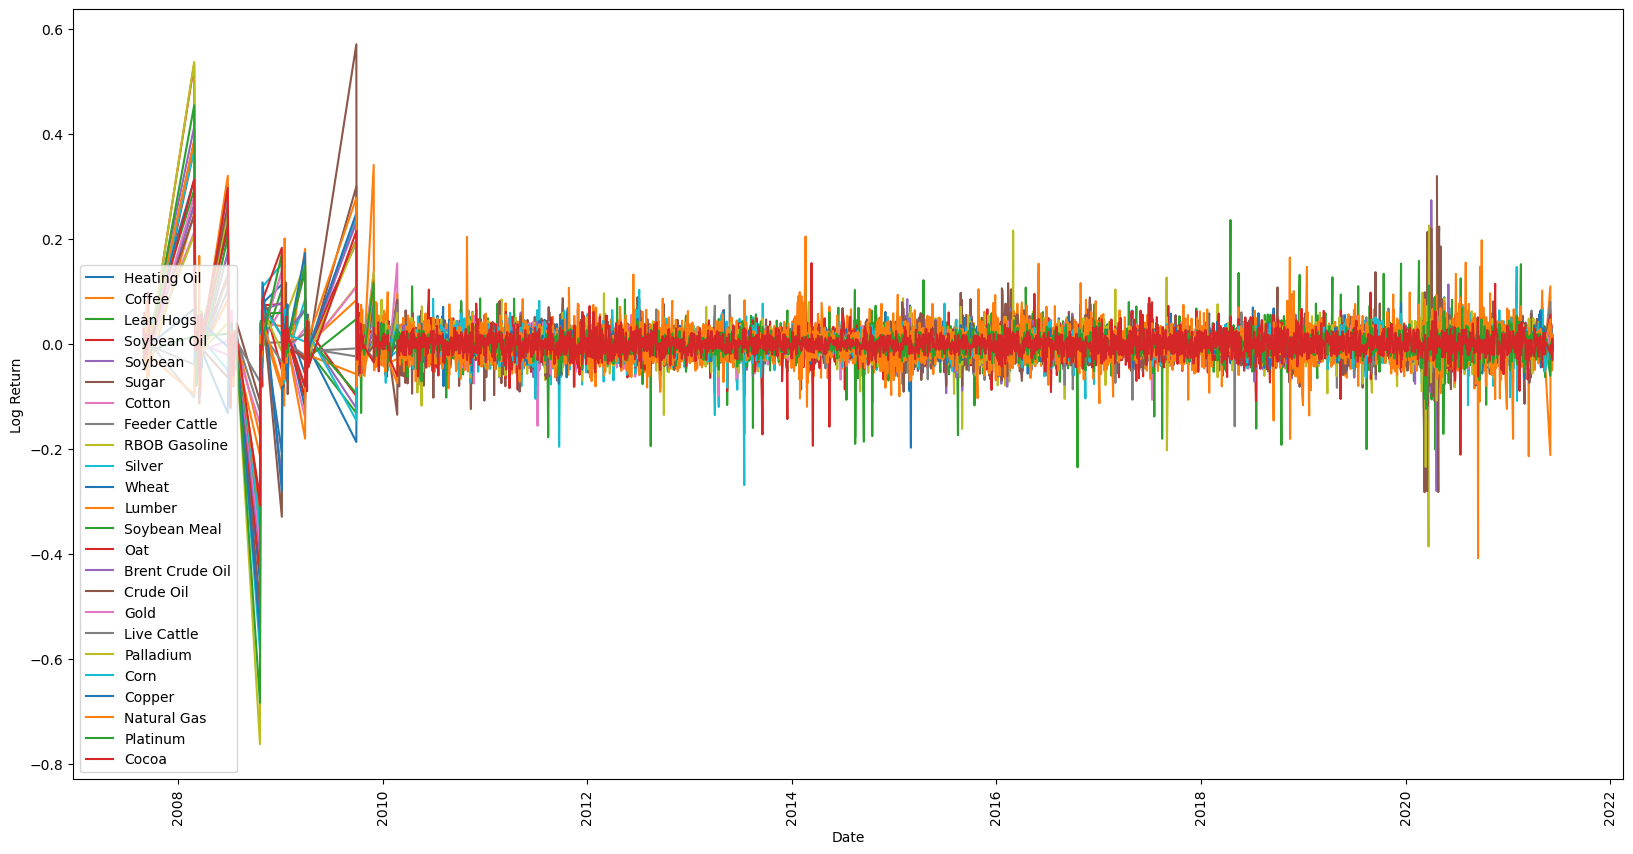

In [13]:
# Plotting the return of each commodity
plt.figure(figsize=(20, 10))
for column in df_pct_change_log.columns:
    plt.plot(df_pct_change_log[column], label=column)
plt.ylabel('Log Return')
plt.xlabel('Date')
plt.legend()

# Set one tick per year on the x-axis
plt.xticks(rotation=90)

plt.show()

The data in 2008-2009 seems scattered after dropna, we will remove data before 2010

In [14]:
#Remove the data before year 2010
df_pct_change_log = df_pct_change_log[(df_pct_change_log.index.year >= 2010) & (df_pct_change_log.index.year < 2020)]
df_pct_change_log

,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.033280,0.042483,0.003804,0.013539,0.009334,0.024557,0.005277,0.000261,0.024972,0.036079,...,0.027715,0.026731,0.020336,-0.007294,0.030351,0.009604,0.018019,0.054483,0.038496,-0.010084
2010-01-05,0.001642,-0.006010,0.026229,-0.004656,0.002617,0.000724,-0.038631,0.007016,0.009741,0.019364,...,0.005849,0.003185,0.000358,0.011066,0.001309,0.000597,0.002358,-0.042885,0.008858,0.019766
2010-01-06,0.004139,0.004246,-0.015279,-0.000983,-0.001664,0.027477,0.005864,-0.002593,0.005444,0.021256,...,0.016002,0.017097,0.015795,-0.004354,0.012412,0.007139,0.023715,0.063906,0.013883,-0.008771
2010-01-07,-0.008936,0.002116,0.007855,-0.016861,-0.031672,-0.014537,-0.009014,0.001556,-0.000796,0.009316,...,-0.004651,-0.006271,-0.002468,-0.000291,-0.006246,-0.010128,-0.019162,-0.034366,0.000515,0.005151
2010-01-08,0.007619,0.024022,0.002233,-0.011570,-0.004678,-0.016928,-0.006193,-0.001037,0.009510,0.006795,...,-0.001719,0.001088,0.004491,-0.001165,0.002833,0.013088,-0.006912,-0.009866,0.007442,-0.003936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.000198,-0.042194,-0.006032,-0.000296,0.006175,-0.006669,0.009519,-0.005212,-0.000410,0.015928,...,0.003773,0.001323,0.005275,0.001431,0.021927,0.002576,0.002132,-0.050209,0.026613,0.004129
2019-12-26,0.014678,0.015836,0.009210,0.017606,0.004007,-0.000744,0.001311,0.013323,0.028104,0.027823,...,0.022784,0.018986,0.017916,0.007123,0.010545,-0.000643,0.016721,0.035496,0.016307,-0.009106
2019-12-27,-0.001219,0.040036,-0.004595,0.010129,-0.008837,0.007413,0.003197,0.000687,-0.003656,-0.002518,...,0.003527,0.000648,0.002977,0.001824,0.006721,0.003854,-0.009823,-0.061115,-0.002945,0.037540


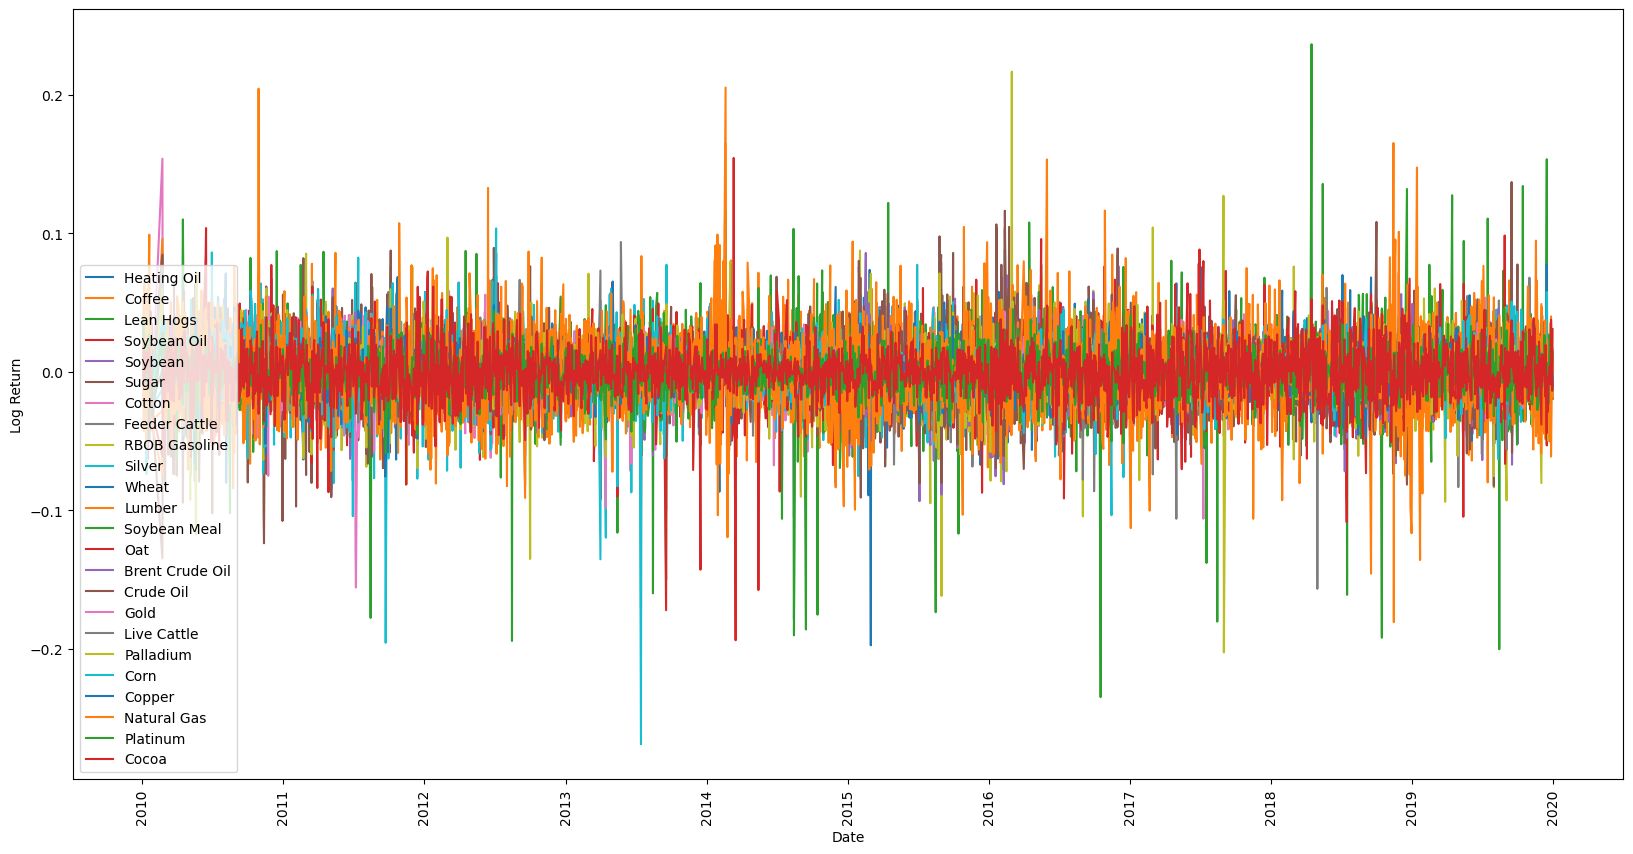

In [15]:
# Plotting the return of each commodity
plt.figure(figsize=(20, 10))
for column in df_pct_change_log.columns:
    plt.plot(df_pct_change_log[column], label=column)

plt.legend()
plt.ylabel('Log Return')
plt.xlabel('Date')
# Set one tick per year on the x-axis
plt.xticks(rotation=90)

plt.show()

The data should be good for analysis now

<Axes: >

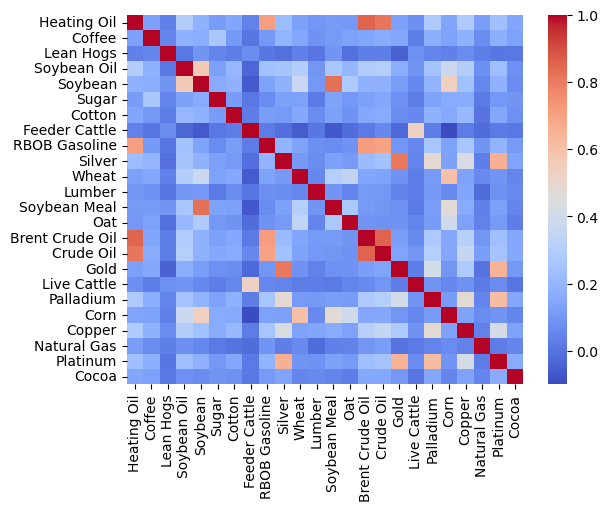

In [16]:
#First, we will have a quick look on the correlation between the commodities
sns.heatmap(df_pct_change_log.corr(), cmap='coolwarm')

Commodities of similar types demonstrate higher correlation as expected (Heating Oil & Gasoline& Crude Oil / Gold & Silver & other metals).

### Train Test Split

In [17]:
#We will now separate the data into training and testing set, using the data from 2010 to 2018 as training set, and the data from 2019 as testing set
df_train = df_pct_change_log[df_pct_change_log.index.year < 2018]
df_val = df_pct_change_log[df_pct_change_log.index.year == 2018]
df_test = df_pct_change_log[df_pct_change_log.index.year == 2019]


In [18]:
df_train.tail()

,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-22,0.009797,-0.015249,0.020210,0.002140,0.000790,-0.011577,-0.000899,-0.009667,0.008376,0.012612,...,0.005378,0.001883,0.006371,0.001670,0.001772,0.002133,0.006241,0.026212,0.003585,-0.052757
2017-12-26,0.034485,0.014839,0.021909,0.013952,0.010216,0.006826,-0.005667,0.019934,0.013695,0.009916,...,0.026765,0.025331,0.006798,0.013882,0.012271,0.002128,0.012828,-0.009040,0.000542,0.025649
2017-12-27,0.000834,0.018647,-0.007015,-0.003923,-0.003917,0.015525,0.019440,0.005353,0.002739,0.005975,...,-0.008692,-0.005518,0.002256,0.004312,0.013056,0.002831,0.000307,0.035313,0.000217,0.005373
2017-12-28,0.005816,0.002407,0.007365,-0.017386,-0.010257,0.004678,-0.001902,0.002923,0.000837,0.012735,...,0.004205,0.003348,0.005502,0.020481,0.004237,-0.004959,0.008864,0.062299,0.004433,0.023830
2017-12-29,0.011338,0.011155,0.003140,0.017689,0.006324,0.010610,-0.002160,0.002743,0.003452,0.013455,...,-0.001800,0.009646,0.009383,-0.012523,-0.002279,-0.003557,-0.001980,0.013295,0.007845,-0.009992


In [19]:
df_val.tail()

,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,-0.009763,-0.027697,-0.020244,-0.011054,-0.009841,-0.007267,-0.025366,-0.000509,-0.003105,-0.011590,...,-0.009799,-0.006341,-0.007786,0.005392,-0.018947,0.008624,-0.008735,0.063002,0.000000,0.000000
2018-12-26,0.000519,0.041263,-0.012346,-0.019186,-0.016812,0.004044,0.004363,0.005077,0.009137,0.028460,...,0.012005,0.013724,0.012208,0.003922,0.022272,-0.013968,0.011138,-0.074229,0.006148,0.067259
2018-12-27,-0.032419,-0.020910,0.003307,-0.001829,-0.001150,-0.011364,-0.019786,0.006059,-0.020043,0.012386,...,-0.043334,-0.035455,0.006362,0.012896,0.014870,0.003343,-0.015253,0.027559,-0.005016,-0.023325
2018-12-28,-0.008136,-0.007894,0.001237,0.007660,0.015699,0.011364,0.001802,0.000503,0.016881,0.008848,...,0.000767,0.016011,0.002033,0.009312,-0.010668,0.002667,0.004302,-0.097702,-0.007444,0.014642
2018-12-31,0.009625,0.008876,0.005344,0.001089,-0.000283,-0.029486,0.000138,-0.001510,-0.001887,0.006957,...,0.001531,0.001763,-0.001251,0.005826,0.011067,-0.001332,-0.019220,-0.116422,0.007947,0.003317


In [20]:
df_test.head()

,Heating Oil,Coffee,Lean Hogs,Soybean Oil,Soybean,Sugar,Cotton,Feeder Cattle,RBOB Gasoline,Silver,...,Brent Crude Oil,Crude Oil,Gold,Live Cattle,Palladium,Corn,Copper,Natural Gas,Platinum,Cocoa
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.011711,-0.023343,0.011820,0.012624,0.013786,-0.008347,-0.019016,-0.006065,0.001434,0.007038,...,0.049082,0.024580,0.002110,-0.010269,0.001275,0.001998,-0.001142,0.006104,0.004012,-0.009148
2019-01-03,0.024053,0.026285,0.007267,0.009986,0.006128,-0.020322,-0.000141,-0.009678,0.017869,0.010497,...,0.018763,0.011748,0.008396,-0.002432,0.001194,0.010589,-0.020980,-0.004405,-0.005773,0.002503
2019-01-04,0.015494,-0.005399,-0.003223,0.008129,0.010222,0.020322,0.023580,-0.011152,-0.001261,-0.000701,...,0.019645,0.018307,-0.007069,-0.010606,0.026767,0.008522,0.031025,0.033064,0.034027,-0.016383
2019-01-07,0.005187,0.011255,-0.000807,-0.005294,0.003019,0.058601,0.003167,0.007563,-0.005207,-0.001658,...,0.004721,0.011609,0.003191,0.010403,0.004482,-0.001960,-0.003968,-0.033403,-0.004389,0.020541
2019-01-08,0.026961,0.022138,0.011245,-0.002835,-0.006599,0.008658,-0.014957,0.011069,0.016128,-0.002748,...,0.023956,0.025637,-0.002802,0.016902,0.016214,-0.005904,0.007356,0.007782,-0.002324,-0.011686


### Finding correlation of commodities

In [21]:
#Now we will use a nested loop to see if varying the lead time and rolling period will give higher correlation between commodities
#We will create two dictionary to store the maximum and minimum correlation for each commodity observed
def commo_study(commodity_to_study):
    
    commo_df = df_train[commodity_to_study]
    other_commodities = df_train.columns[df_train.columns != commodity_to_study]
    other_df = df_train[other_commodities]

    max_corr = {}
    min_corr = {}

    rolling_periods = range(1,90)  # Specify the rolling periods you want to consider
    lead_time_periods = range(0,120)  # Specify the lead time periods you want to consider

    for commodity in other_commodities:
        #Format is[max_corr, max_lead_time, max_rolling_period]
        max_corr[commodity] = [-np.inf,0,0]
        min_corr[commodity] = [np.inf,0,0]

    # Calculate the correlation and lead time for each combination of rolling and lead time periods
        for rolling_period in rolling_periods:
            for lead_time_period in lead_time_periods:
                
                corr = commo_df.shift(-lead_time_period).rolling(rolling_period).mean().dropna().corr(other_df[commodity])
                if max_corr[commodity][0] < corr:
                    max_corr[commodity] = [corr, lead_time_period, rolling_period]
                elif min_corr[commodity][0] > corr:
                    min_corr[commodity] = [corr, lead_time_period, rolling_period]

    max_corr = sorted(max_corr.items(), key=lambda x: x[1][0], reverse=True)
    min_corr = sorted(min_corr.items(), key=lambda x: x[1][0], reverse=False)
    
    return max_corr, min_corr


In [22]:
#Let's find the maximum and minimum correlation for Crude Oil
max_corr_oil, min_corr_oil = commo_study('Crude Oil')

In [53]:
max_corr_oil

[('Brent Crude Oil', [0.861536918167556, 0, 1]),
 ('Heating Oil', [0.8035983648483261, 0, 1]),
 ('RBOB Gasoline', [0.6854762935467469, 0, 1]),
 ('Copper', [0.3823840907718262, 0, 1]),
 ('Palladium', [0.3345705559538804, 0, 1]),
 ('Soybean Oil', [0.32025373521930356, 0, 1]),
 ('Platinum', [0.2690448628279198, 0, 1]),
 ('Silver', [0.2637948893162158, 0, 1]),
 ('Soybean', [0.19153564753375973, 0, 1]),
 ('Coffee', [0.18389155039945237, 0, 1]),
 ('Cocoa', [0.16551785608140207, 0, 1]),
 ('Corn', [0.16054736173700607, 0, 1]),
 ('Cotton', [0.15990773370635128, 0, 1]),
 ('Sugar', [0.15748587285035395, 0, 1]),
 ('Gold', [0.15538024428338232, 0, 1]),
 ('Wheat', [0.1473941609243702, 0, 1]),
 ('Natural Gas', [0.12267660077504444, 0, 1]),
 ('Live Cattle', [0.11514391799491097, 0, 1]),
 ('Lumber', [0.11267666005409196, 0, 1]),
 ('Soybean Meal', [0.09869991817754072, 0, 1]),
 ('Oat', [0.09630189062271298, 0, 1]),
 ('Lean Hogs', [0.08096527153111155, 0, 19]),
 ('Feeder Cattle', [0.06666264307706228, 0,

### Model Training

First, we will define a model for generating data sets in array types, for tensorflow's input.

In [57]:
# Define a model for output training data in form of arrays
def train_test(corr_commodity, study_commodity, window_size=1):
    '''Model for output training data in form of arrays, returns 6 variables X_train, y_train, X_val, y_val, X_test, y_test
    '''
    X_train = df_train[corr_commodity]
    X_val = df_val[corr_commodity]
    X_test = df_test[corr_commodity]

    X_train_roll = df_train[corr_commodity].rolling(window_size).sum()
    X_val_roll = df_val[corr_commodity].rolling(window_size).sum()
    X_test_roll = df_test[corr_commodity].rolling(window_size).sum()

    y_train = df_train[study_commodity].values
    y_val = df_val[study_commodity].values
    y_test = df_test[study_commodity].values
    
    X_train = np.concatenate((X_train, X_train_roll), axis=1)
    print(f"X_train shape: {X_train.shape}")
    X_val = np.concatenate((X_val, X_val_roll), axis=1)
    print(f"X_val shape: {X_val.shape}")
    X_test = np.concatenate((X_test, X_test_roll), axis=1)
    print(f"X_test shape: {X_test.shape}")

    mask = np.isnan(X_train)
    X_train = X_train[~np.any(mask, axis=1)]
    y_train = y_train[~np.any(mask, axis=1)]

    mask = np.isnan(X_val)
    X_val = X_val[~np.any(mask, axis=1)]
    y_val = y_val[~np.any(mask, axis=1)]

    mask = np.isnan(X_test)
    X_test = X_test[~np.any(mask, axis=1)]
    y_test = y_test[~np.any(mask, axis=1)]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [36]:
X_train, y_train, X_val, y_val, X_test, y_test = train_test(['Brent Crude Oil','Heating Oil'], 'Crude Oil', window_size=1)

X_train shape: (1929, 4)
X_val shape: (240, 4)
X_test shape: (248, 4)


To find the best hyperparameters for our model, we will use GridSearchCV.</br>
We will first create a function for creating models, which takes inputs of hidden_layers, activation and nodes from GridSearchCV. We will then save the model with lowest validation loss.

In [37]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define the function to create the model
def create_model(hidden_layers=1, activation='relu', nodes=16):
    model = Sequential()
    model.add(Dense(nodes, activation=activation, input_shape=(4,)))

    # Add hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(nodes, activation=activation))

    model.add(Dense(1, activation='linear'))

    learning_rate = 0.0001
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor wrapper for scikit-learn
model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layers': [1, 2, 3],
    'activation': ['relu'],
    'nodes': [16, 32]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Get the best model and its validation loss
best_model = grid_search.best_estimator_.model
best_val_loss = best_model.evaluate(X_val, y_val)

print("Best Validation Loss:", best_val_loss)


Epoch 1/50


/tmp/ipykernel_298/1154202030.py:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=1)


41/41 [==============================] - 2s 9ms/step - loss: 4.8040e-04 - val_loss: 2.0961e-04
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 3.0370e-04 - val_loss: 1.5159e-04
Epoch 3/50
41/41 [==============================] - 0s 6ms/step - loss: 2.3816e-04 - val_loss: 1.3169e-04
Epoch 4/50
41/41 [==============================] - 0s 5ms/step - loss: 2.0861e-04 - val_loss: 1.2484e-04
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 1.9160e-04 - val_loss: 1.1993e-04
Epoch 6/50
41/41 [==============================] - 0s 5ms/step - loss: 1.8180e-04 - val_loss: 1.1804e-04
Epoch 7/50
41/41 [==============================] - 0s 7ms/step - loss: 1.7467e-04 - val_loss: 1.1647e-04
Epoch 8/50
41/41 [==============================] - 0s 5ms/step - loss: 1.6886e-04 - val_loss: 1.1362e-04
Epoch 9/50
41/41 [==============================] - 0s 5ms/step - loss: 1.6436e-04 - val_loss: 1.1152e-04
Epoch 10/50
41/41 [==============================] - 0s 8

In [38]:
#Have a look on the architecture of the best model
best_model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 32)                160       
                                                                 
 dense_128 (Dense)           (None, 32)                1056      
                                                                 
 dense_129 (Dense)           (None, 32)                1056      
                                                                 
 dense_130 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


Now, further train the best model to see if predictions could be further improved.

In [39]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min', restore_best_weights=True)

history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, callbacks=[early_stopping])

Epoch 1/500
61/61 [==============================] - 0s 6ms/step - loss: 9.6479e-05 - val_loss: 8.1114e-05
Epoch 2/500
61/61 [==============================] - 1s 10ms/step - loss: 9.6975e-05 - val_loss: 8.0511e-05
Epoch 3/500
61/61 [==============================] - 1s 9ms/step - loss: 9.6570e-05 - val_loss: 8.2462e-05
Epoch 4/500
61/61 [==============================] - 1s 11ms/step - loss: 9.7383e-05 - val_loss: 8.1360e-05
Epoch 5/500
61/61 [==============================] - 0s 5ms/step - loss: 9.7312e-05 - val_loss: 8.1232e-05
Epoch 6/500
61/61 [==============================] - 0s 6ms/step - loss: 9.6980e-05 - val_loss: 8.0863e-05
Epoch 7/500
61/61 [==============================] - 0s 6ms/step - loss: 9.5931e-05 - val_loss: 8.0813e-05
Epoch 8/500
61/61 [==============================] - 0s 5ms/step - loss: 9.6160e-05 - val_loss: 8.0264e-05
Epoch 9/500
61/61 [==============================] - 1s 12ms/step - loss: 9.5980e-05 - val_loss: 8.1398e-05
Epoch 10/500
61/61 [==============

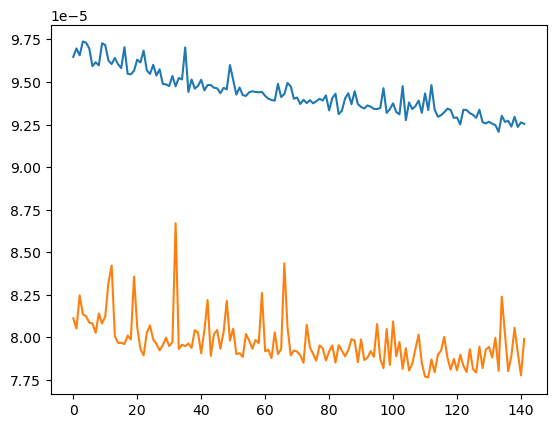

In [40]:
#Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

There is slight improvement in train set data with more epochs, however the validation loss didn't improve for 30 epochs and the training was early stopped. We will use this model to make prediction on the test set.

In [41]:
# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model:")
print(best_model.summary())
print(f"MSE: {mse}, MAE: {mae}, R^2 Score: {r2}")

8/8 [==============================] - 3s 39ms/step
Best Model:
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 32)                160       
                                                                 
 dense_128 (Dense)           (None, 32)                1056      
                                                                 
 dense_129 (Dense)           (None, 32)                1056      
                                                                 
 dense_130 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None
MSE: 8.012481564284545e-05, MAE: 0.006058411518470842, R^2 Score: 0.8238848699028215


In the above model, we have completed the followings:</br>
1. Train the model with data from 2010-2017, using price of Heating Oil, Brent Crude Oil as X_train, Crude oil as Y_train.
2. Validate with data from 2018.
3. Using the model the predict Crude Oil price in 2019, with prices of Heating Oil and Brent Crude Oil from the same period.</br>

We got an R^2 score of 0.824, indicating a good fit.


### Further feature engineering

We will see if we can further improve the model performance, by introducing rolling return as additional parameter. We will set the window size to 1,5,10 and see.

In [42]:
X_train, y_train, X_val, y_val, X_test, y_test = train_test(['Brent Crude Oil','Heating Oil'], 'Crude Oil', window_size=1)

X_train shape: (1929, 4)
X_val shape: (240, 4)
X_test shape: (248, 4)


In [43]:
# Define the function to create the model
def create_model(hidden_layers=1, activation='tanh', nodes=16):
    model = Sequential()
    model.add(Dense(nodes, activation=activation, input_shape=(X_train.shape[1],)))

    # Add hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(nodes, activation=activation))

    model.add(Dense(1, activation='linear'))

    learning_rate = 0.0001
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model



In [58]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


best_model_roll = None
best_val_loss = float('-inf')
best_window_size = None

# Iterate over window sizes of [1,5,10]
for window_size in [1, 5, 10]:
    print(f"Window Size: {window_size}")
    X_train, y_train, X_val, y_val, X_test, y_test = train_test(['Brent Crude Oil', 'Heating Oil'], 'Crude Oil', window_size=window_size)

    model = KerasRegressor(build_fn=create_model, verbose=0)

    param_grid = {
        'hidden_layers': [1, 2, 3],
        'activation': ['relu'],
        'nodes': [16, 32]
    }

    # Perform rolling window cross-validation
    tscv = TimeSeriesSplit(n_splits=3)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

    if grid_search.best_score_ > best_val_loss:
        best_model_roll = grid_search.best_estimator_.model  # Access the underlying Keras model
        best_val_loss = grid_search.best_score_
        best_window_size = window_size

    print("Best Validation Loss:", grid_search.best_score_)



Window Size: 1
X_train shape: (1929, 4)
X_val shape: (240, 4)
X_test shape: (248, 4)


/tmp/ipykernel_298/235979152.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Validation Loss: -0.000104731454196417
Window Size: 5
X_train shape: (1929, 4)
X_val shape: (240, 4)
X_test shape: (248, 4)


/tmp/ipykernel_298/235979152.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Validation Loss: -0.00012003695732727255
Window Size: 10
X_train shape: (1929, 4)
X_val shape: (240, 4)
X_test shape: (248, 4)


/tmp/ipykernel_298/235979152.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Validation Loss: -0.0001236058333775003


The rolling of returns did not improve the accuracy of model, the best validation loss is rolling =1, i.e. no rolling.

In [59]:
best_model_roll.summary()

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_357 (Dense)           (None, 32)                160       
                                                                 
 dense_358 (Dense)           (None, 32)                1056      
                                                                 
 dense_359 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


It is noted that the model architecture has only 1 hidden layer, compared to 2 hidden layers that we have got in previous section.

In [60]:
X_train, y_train, X_val, y_val, X_test, y_test = train_test(['Brent Crude Oil', 'Heating Oil'], 'Crude Oil', window_size=best_window_size)

X_train shape: (1929, 4)
X_val shape: (240, 4)
X_test shape: (248, 4)


In [61]:
history_best = best_model_roll.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, callbacks=[early_stopping])

Epoch 1/500
61/61 [==============================] - 0s 8ms/step - loss: 9.9548e-05 - val_loss: 8.2237e-05
Epoch 2/500
61/61 [==============================] - 0s 7ms/step - loss: 9.9610e-05 - val_loss: 8.2450e-05
Epoch 3/500
61/61 [==============================] - 0s 6ms/step - loss: 9.9204e-05 - val_loss: 8.2285e-05
Epoch 4/500
61/61 [==============================] - 0s 8ms/step - loss: 9.9499e-05 - val_loss: 8.2522e-05
Epoch 5/500
61/61 [==============================] - 0s 7ms/step - loss: 9.9433e-05 - val_loss: 8.2064e-05
Epoch 6/500
61/61 [==============================] - 1s 10ms/step - loss: 9.9451e-05 - val_loss: 8.1800e-05
Epoch 7/500
61/61 [==============================] - 0s 6ms/step - loss: 9.8739e-05 - val_loss: 8.2358e-05
Epoch 8/500
61/61 [==============================] - 0s 5ms/step - loss: 9.9338e-05 - val_loss: 8.2006e-05
Epoch 9/500
61/61 [==============================] - 0s 7ms/step - loss: 9.8512e-05 - val_loss: 8.1943e-05
Epoch 10/500
61/61 [================

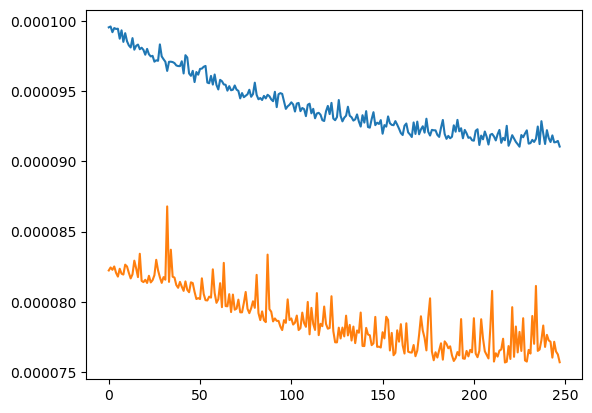

In [62]:
loss = history_best.history['loss']
val_loss = history_best.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

We can see the training loss has flattened after ~200 epochs, so as val loss which has lead to early stopping of model training.

In [64]:
# Make predictions on the test data using the best model
y_pred = best_model_roll.predict(X_test)

# Evaluate the best model on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model:")
print(best_model_roll.summary())
print(f"MSE: {mse}, MAE: {mae}, R^2 Score: {r2}")

8/8 [==============================] - 0s 4ms/step
Best Model:
Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_357 (Dense)           (None, 32)                160       
                                                                 
 dense_358 (Dense)           (None, 32)                1056      
                                                                 
 dense_359 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
MSE: 7.78028087177646e-05, MAE: 0.005941118296348919, R^2 Score: 0.8289886638824545


The model ends up having very similar performance compared to the version in previous section

## Conclusion

In this project we have successfully predicted the price of Crude Oil, based on the price of Heating Oil and Brent Crude Oil from the same period, with a R^2 score of ~0.83. It is noted that rolling of daily close price (of 5 days and 10 days) did not improve the performance. We may need to further analyze price of a shorter period (say minutes or seconds) to observe more correlation between commodities. As Brent Crude Oil and Crude Oil (WTI) is one of the most liquid commodities in market, they have very high market efficiency and prices reactions should be within minutes, if not seconds.